## 1. Introduction

This notebook demonstrates how different models (Random Forest, Feed-Forward NN, CNN) perform on the MNIST dataset.
It also evaluates edge cases such as noisy images & rotated images

## 2. Necessary imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

from tensorflow import keras
from mnist_classifier import MnistClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.ndimage import rotate

## 3. Data Preparation

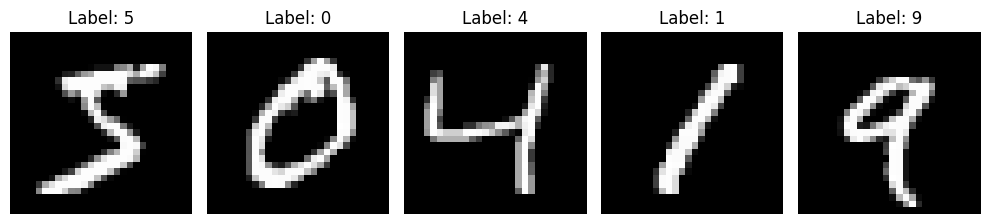

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# data for Random Forest
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

# data for FNN
X_train_nn = X_train_rf / 255.0
X_test_nn = X_test_rf / 255.0

# data for CNN
X_train_cnn = (X_train / 255.0).reshape(-1, 28, 28, 1)
X_test_cnn = (X_test / 255.0).reshape(-1, 28, 28, 1)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 4. Model Training & Evaluation

#### Random Forest

You can load the Random Forest model from the saved file (random_forest_model.pkl) running the cell below(it contains the hyperparameter-tuned version of the classifier)

In [10]:
model_filename = "saved_models/random_forest_model.pkl"
finetuned_rf_classifier = MnistClassifier("rf")
finetuned_rf_classifier.load_model(model_filename)
rf_accuracy = finetuned_rf_classifier.evaluate(X_test_rf, y_test)
print(f"The accuracy of the hyperparameter-tuned Random Forest is: {rf_accuracy}")

Loaded model from saved_models/random_forest_model.pkl
 32/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

The accuracy of the hyperparameter-tuned Random Forest is: 0.9796


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


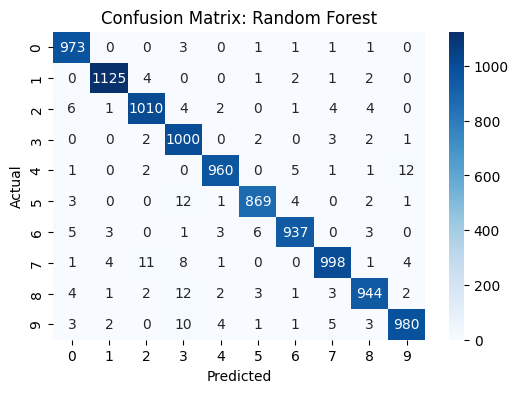

In [11]:
y_pred_rf = finetuned_rf_classifier.predict(X_test_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Random Forest")
plt.show()

Alternatively, you can run the Random Forest model with default parameters without loading a pre-trained model.

In [5]:
# In my implementation, the default parameters for the Random Forest model are:
# •	n_estimators(the number of trees in the forest): 50
# •	tune: False (by default, tuning is disabled)
rf_classifier = MnistClassifier("rf")

rf_classifier.train(X_train_rf, y_train)

rf_accuracy = rf_classifier.evaluate(X_test_rf, y_test)
print(f"The accuracy of the Random Forest (default parameters) is: {rf_accuracy:.4f}")

Training Random Forest model...

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

The accuracy of the Random Forest (default parameters) is: 0.9664


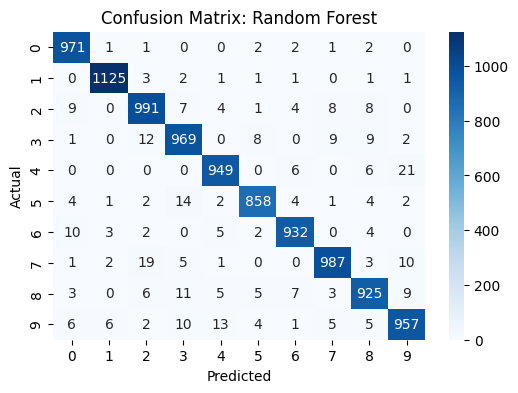

In [6]:
y_pred_rf_ = rf_classifier.predict(X_test_rf)
cm_rf_ = confusion_matrix(y_test, y_pred_rf_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Random Forest")
plt.show()

#### Feed-Forward Neural Network

You can load the Feed-Forward NN model from the saved file (feedforward_nn_model.h5) running the cell below(it contains the hyperparameter-tuned version of the classifier)

In [7]:
model_filename = "saved_models/feedforward_nn_model.h5"
finetuned_nn_classifier = MnistClassifier("nn")
finetuned_nn_classifier.load_model(model_filename)

nn_accuracy = finetuned_nn_classifier.evaluate(X_test_nn, y_test)
print(f"The accuracy of the hyperparameter-tuned FNN is: {nn_accuracy:.4f}")

Loaded model from saved_models/feedforward_nn_model.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

The accuracy of the hyperparameter-tuned FNN is: 0.9808


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step


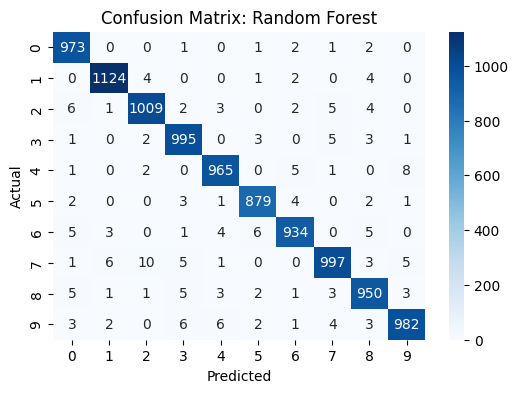

In [8]:
y_pred_nn = finetuned_nn_classifier.predict(X_test_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Random Forest")
plt.show()

Alternatively, you can run the Feed-Forward NN model with default parameters without loading a pre-trained model. However, the performance is not as optimized as the tuned version.

In [9]:
# In my implementation, the default parameters for the FNN model are:
# •	optimizer: "adam"
# •	dropout_rate: 0.3
# •	batch_size: 32
# •	tune: False (by default, tuning is disabled)
# Early Stopping is performed by default

nn_classifier = MnistClassifier("nn")

nn_classifier.train(X_train_nn, y_train)
nn_accuracy = nn_classifier.evaluate(X_test_nn, y_test)
print(f"The accuracy of the FNN (default parameters) is: {nn_accuracy:.4f}")

Training the Feed-Forward Neural Network...
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7860 - loss: 0.6882 - val_accuracy: 0.9657 - val_loss: 0.1196 - learning_rate: 0.0010
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9324 - loss: 0.2297 - val_accuracy: 0.9722 - val_loss: 0.0915 - learning_rate: 0.0010
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9492 - loss: 0.1692 - val_accuracy: 0.9730 - val_loss: 0.0847 - learning_rate: 0.0010
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9578 - loss: 0.1434 - val_accuracy: 0.9765 - val_loss: 0.0757 - learning_rate: 0.0010
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9611 - loss: 0.1304 - val_accuracy: 0.9792 - val_loss: 0.0702 - learning_rate: 0.0010
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9637 - loss: 0.1182 - val_accuracy: 0.9797 - val_loss: 0.0719 - learning_rate: 0.0010
Epoch 7/50
1688/1688 ━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


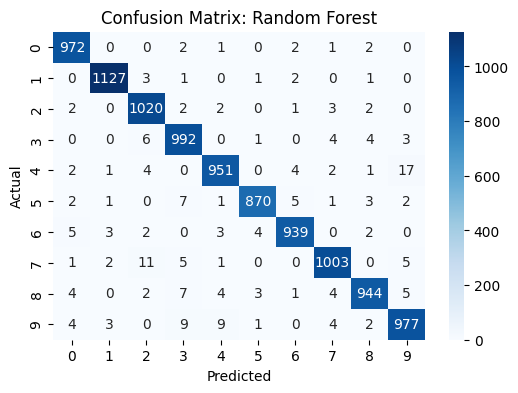

In [10]:
y_pred_nn = nn_classifier.predict(X_test_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Random Forest")
plt.show()

#### Convolutional Neural Network

You can load the Convolutional Neural Network model from the saved file ("cnn_model.h5") running the cell below(it contains the hyperparameter-tuned version of the classifier)

In [11]:
model_filename = "saved_models/cnn_model.h5"
finetuned_cnn_classifier = MnistClassifier("cnn")
finetuned_cnn_classifier.load_model(model_filename)

cnn_accuracy = finetuned_cnn_classifier.evaluate(X_test_cnn, y_test)
print(f"The accuracy of the hyperparameter-tuned CNN is: {cnn_accuracy:.4f}")

Loaded model from saved_models/cnn_model.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

The accuracy of the hyperparameter-tuned CNN is: 0.9929


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


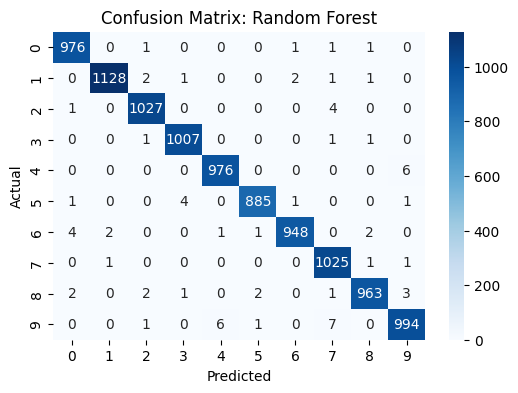

In [12]:
y_pred_cnn = finetuned_cnn_classifier.predict(X_test_cnn)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Random Forest")
plt.show()

Alternatively, you can run the Convolutional Neural Network model with default parameters without loading a pre-trained model. However, the performance is not as optimized as the tuned version.

In [14]:
# In my implementation, the default parameters for the CNN model are:
# •	optimizer: "adam"
# •	dropout_rate: 0.2
# •	batch_size: 8
# •	tune: False (by default, tuning is disabled)
# Early Stopping is performed by default

cnn_classifier = MnistClassifier("cnn")

cnn_classifier.train(X_train_cnn, y_train)

cnn_accuracy = cnn_classifier.evaluate(X_test_cnn, y_test)
print(f"The accuracy of the CNN (default parameters) is: {cnn_accuracy:.4f}")

Training the CNN model...
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9431 - loss: 0.1865 - val_accuracy: 0.9892 - val_loss: 0.0397 - learning_rate: 0.0010
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9856 - loss: 0.0458 - val_accuracy: 0.9835 - val_loss: 0.0557 - learning_rate: 0.0010
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9891 - loss: 0.0318 - val_accuracy: 0.9898 - val_loss: 0.0357 - learning_rate: 0.0010
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9898 - val_loss: 0.0384 - learning_rate: 0.0010
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9940 - loss: 0.0196 - val_accuracy: 0.9918 - val_loss: 0.0348 - learning_rate: 0.0010
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9948 - loss: 0.0158 - val_accuracy: 0.9915 - val_loss: 0.0328 - learning_rate: 0.0010
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


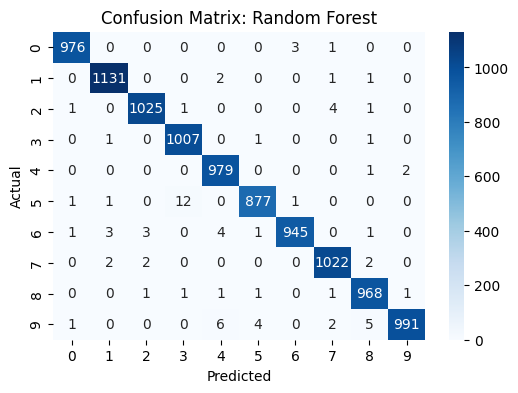

In [15]:
y_pred_cnn = cnn_classifier.predict(X_test_cnn)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Random Forest")
plt.show()

## 5. Edge Case Testing

##### Occluded images

In [16]:
def occlude_images(images, occlusion_size=10):
    """
    Creates occluded versions of images by blocking out a random square.

    Args:
        images: original images.
        occlusion_size: size of the square to occlude.

    Returns:
        occluded images.
    """
    occluded_images = images.copy()
    for img in occluded_images:
        x, y = random.randint(0, 28 - occlusion_size), random.randint(0, 28 - occlusion_size)
        img[x:x+occlusion_size, y:y+occlusion_size] = 0
    return occluded_images

In [17]:
X_test_occluded = occlude_images(X_test)
X_test_occluded_rf = X_test_occluded.reshape(X_test_occluded.shape[0], -1) / 255.0
X_test_occluded_cnn = X_test_occluded.reshape(-1, 28, 28, 1) / 255.0

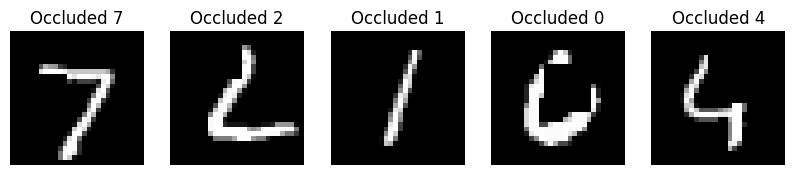

In [18]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_occluded[i], cmap='gray')
    plt.title(f"Occluded {y_test[i]}")
    plt.axis('off')
plt.show()

In [19]:
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.metrics")
print("Performance on Occluded Data:")
rf_occluded_acc = finetuned_rf_classifier.evaluate(X_test_occluded_rf, y_test)
nn_occluded_acc = finetuned_nn_classifier.evaluate(X_test_occluded_rf, y_test)
cnn_occluded_acc = finetuned_cnn_classifier.evaluate(X_test_occluded_cnn, y_test)

Performance on Occluded Data:

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.65      0.63      0.64      1135
           2       0.89      0.02      0.05      1032
           3       0.82      0.02      0.04      1010
           4       0.38      0.17      0.23       982
           5       0.15      0.33      0.21       892
           6       0.00      0.00      0.00       958
           7       0.16      0.99      0.27      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.22     10000
   macro avg       0.31      0.22      0.14     10000
weighted avg       0.32      0.22      0.15     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       980
          

In [20]:
print(f"Random Forest (Occluded): {rf_occluded_acc:.4f}")
print(f"FNN (Occluded): {nn_occluded_acc:.4f}")
print(f"CNN (Occluded): {cnn_occluded_acc:.4f}")

Random Forest (Occluded): 0.2235
FNN (Occluded): 0.7786
CNN (Occluded): 0.8190


We can see that Random Forest in this case struggles to correctly identify most of the digits, while FFNN and CNN perform better. We can conclude that Neural Networks are less sensitive  to distortions and missing information likely because they learn hierarchical and spatial features, whereas Random Forest relies on pixel-level patterns.

##### Rotation

In [21]:
def rotate_images(images, angle_range=30):
    """
    Rotates images randomly within a given angle range.

    Args:
        images: the original images.
        angle_range: maximum angle for rotation.

    Returns:
        totated images.
    """
    return np.array([rotate(img, random.uniform(-angle_range, angle_range), reshape=False) for img in images])

In [22]:
X_test_rotated = rotate_images(X_test)
X_test_rotated_rf = X_test_rotated.reshape(X_test_rotated.shape[0], -1) / 255.0
X_test_rotated_cnn = X_test_rotated.reshape(-1, 28, 28, 1) / 255.0

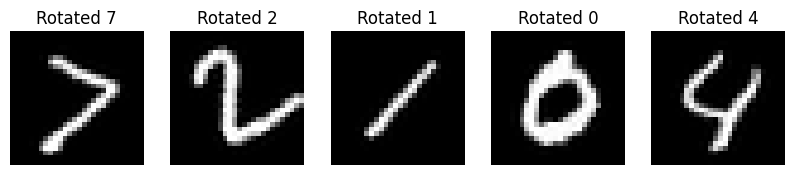

In [23]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_rotated[i], cmap='gray')
    plt.title(f"Rotated {y_test[i]}")
    plt.axis('off')
plt.show()

In [24]:
print("Performance on Rotated Data:")
rf_rotated_acc = finetuned_rf_classifier.evaluate(X_test_rotated_rf, y_test)
nn_rotated_acc = finetuned_nn_classifier.evaluate(X_test_rotated_rf, y_test)
cnn_rotated_acc = finetuned_cnn_classifier.evaluate(X_test_rotated_cnn, y_test)

Performance on Rotated Data:

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.74      0.75      0.75      1135
           2       1.00      0.07      0.13      1032
           3       0.77      0.02      0.04      1010
           4       0.36      0.31      0.33       982
           5       0.17      0.44      0.25       892
           6       0.00      0.00      0.00       958
           7       0.18      0.98      0.31      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.27     10000
   macro avg       0.32      0.26      0.18     10000
weighted avg       0.33      0.27      0.19     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           

In [25]:
print(f"Random Forest (Rotated): {rf_rotated_acc:.4f}")
print(f"FNN (Rotated): {nn_rotated_acc:.4f}")
print(f"CNN (Rotated): {cnn_rotated_acc:.4f}")

Random Forest (Rotated): 0.2657
FNN (Rotated): 0.9055
CNN (Rotated): 0.9582


The same as in previous edge case, Random Forest model performs poorly on rotated images, while the FFNN and CNN models handle rotation much more better.

## 6. Final Results

$$
\begin{array}{|l|c|c|}
\hline
\textbf{Model} & \textbf{Default Accuracy} & \textbf{Tuned Accuracy} \\
\hline
\text{Random Forest} & 0.9664 & 0.9796 \\
\text{Feed-Forward Neural Network} & 0.9795 & 0.9808 \\
\text{Convolutional Neural Network} & 0.9921 & 0.9929 \\
\hline
\end{array}
$$

$$
\begin{array}{|l|c|c|}
\hline
\textbf{Model} & \textbf{Occluded Accuracy} & \textbf{Rotated Accuracy} \\
\hline
\text{Random Forest} & 0.2235 & 0.2657 \\
\text{Feed-Forward Neural Network} & 0.7786 & 0.9055 \\
\text{Convolutional Neural Network} & 0.8190 & 0.9582 \\
\hline
\end{array}
$$

From the results, we can see that deep learning models (FFNN and CNN) outperform the Random Forest model, meaning that for practical MNIST digit classification FFNN and CNN are the most reliable choices